In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
df_train= pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')

In [76]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [77]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [78]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [80]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [81]:
df= df_train.append(df_test)

In [82]:
df_train.shape

(10683, 11)

In [83]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [85]:
#Feaatuerre

df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [86]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [87]:
# df['Date']=df['Date_of_Journey'].apply(lambda x: x.split('/').str[0]
# df['Month']=df['Date_of_Journey'].str.split('/').str[1]
# df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [88]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [89]:
df.drop('Date_of_Journey', axis=1,inplace=True)

In [90]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [91]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]
#Another way
#df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ').str[0])

In [92]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [93]:
df['Arrival_hour']=df['Arrival_Time'].apply(lambda x:x.split(':')[0])
df['Arrival_min']=df['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [94]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [96]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [97]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [98]:
df['Dep_hour']=df['Dep_Time'].apply(lambda x:x.split(':')[0])
df['Dep_min']=df['Dep_Time'].apply(lambda x:x.split(':')[1])
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']=df['Dep_min'].astype(int)


In [99]:
df.drop('Dep_Time',axis=1,inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dep_hour         13354 non-null  int32  
 14  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [101]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [102]:
df.Total_Stops=df.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [103]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
dtype: int64

In [104]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [105]:
df.drop('Route',axis=1,inplace=True)

In [106]:
df['Dur_hr']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
                

In [107]:
print(df[df['Duration']=='5m'])
#df.head()

        Airline  Source Destination Duration  Total_Stops Additional_Info  \
6474  Air India  Mumbai   Hyderabad       5m            2         No info   
2660  Air India  Mumbai   Hyderabad       5m            2         No info   

        Price  Date  Month  Year  Arrival_hour  Arrival_min  Dep_hour  \
6474  17327.0     6      3  2019            16           55        16   
2660      NaN    12      3  2019            16           55        16   

      Dep_min Dur_hr  
6474       50     5m  
2660       50     5m  


In [108]:
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13351 non-null  int64  
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Dep_hour         13351 non-null  int32  
 13  Dep_min          13351 non-null  int32  
 14  Dur_hr           13351 non-null  object 
dtypes: float64(1), int32(7), int64(1), object(6)
memory usage: 1.3+ MB


In [110]:
df.Dur_hr=df.Dur_hr.astype(int)
#print(df[df['Dur_hr']=='5m'])
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Dur_hr'],
      dtype='object')

In [111]:
df.drop('Duration',axis=1,inplace=True)

In [112]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [113]:
from sklearn import preprocessing
labelenc=preprocessing.LabelEncoder()

In [114]:
#df.info()
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Dur_hr
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7


In [115]:
df['Airline']=labelenc.fit_transform(df['Airline'])
df['Destination']=labelenc.fit_transform(df.Destination)
df['Additional_Info']=labelenc.fit_transform(df.Additional_Info)
df['Source']=labelenc.fit_transform(df.Source)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Total_Stops      13351 non-null  int64  
 4   Additional_Info  13351 non-null  int32  
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   Year             13351 non-null  int32  
 9   Arrival_hour     13351 non-null  int32  
 10  Arrival_min      13351 non-null  int32  
 11  Dep_hour         13351 non-null  int32  
 12  Dep_min          13351 non-null  int32  
 13  Dur_hr           13351 non-null  int32  
dtypes: float64(1), int32(12), int64(1)
memory usage: 938.7 KB


In [117]:
df.isnull().sum()
#df['Total_Stops']=df['Total_Stops'].astype(int)

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
Dur_hr                0
dtype: int64

In [118]:
df.head(20)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Dur_hr
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4
5,8,3,0,0,8,3873.0,24,6,2019,11,25,9,0,2
6,4,0,5,1,5,11087.0,12,3,2019,10,25,18,55,15
7,4,0,5,1,8,22270.0,1,3,2019,5,5,8,0,21
8,4,0,5,1,5,11087.0,12,3,2019,10,25,8,55,25
9,6,2,1,1,8,8625.0,27,5,2019,19,15,11,25,7


In [119]:
#pd.get_dummies(df,columns=["Airline", "Source", "Destination",'Additional_Info' ] ,drop_first = True)

In [120]:
df.shape

(13351, 14)

In [121]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
Dur_hr                0
dtype: int64

In [122]:
df_test = df[df['Price'].isnull()]
df_train = df[~df['Price'].isnull()]

In [123]:
X = df_train.loc[:,~df_train.columns.isin(['Price'])]
y= df_train['Price']

In [124]:
y.shape

(10681,)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [126]:
X_train.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Dur_hr
count,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.0,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000
mean,3.962549,1.948016,1.421185,0.826579,7.407071,13.565260,4.716042,2019.0,13.337339,24.700950,12.438373,24.465484,10.246087
std,2.339822,1.169891,1.457938,0.675806,1.203257,8.489765,1.161760,0.0,6.881503,16.607484,5.753568,18.719417,8.507124
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,6.000000,3.000000,2019.0,8.000000,10.000000,7.000000,5.000000,2.000000
50%,4.000000,2.000000,1.000000,1.000000,8.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.000000
75%,4.000000,3.000000,2.000000,1.000000,8.000000,21.000000,6.000000,2019.0,19.000000,35.000000,17.000000,40.000000,15.000000
max,10.000000,4.000000,5.000000,4.000000,9.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000


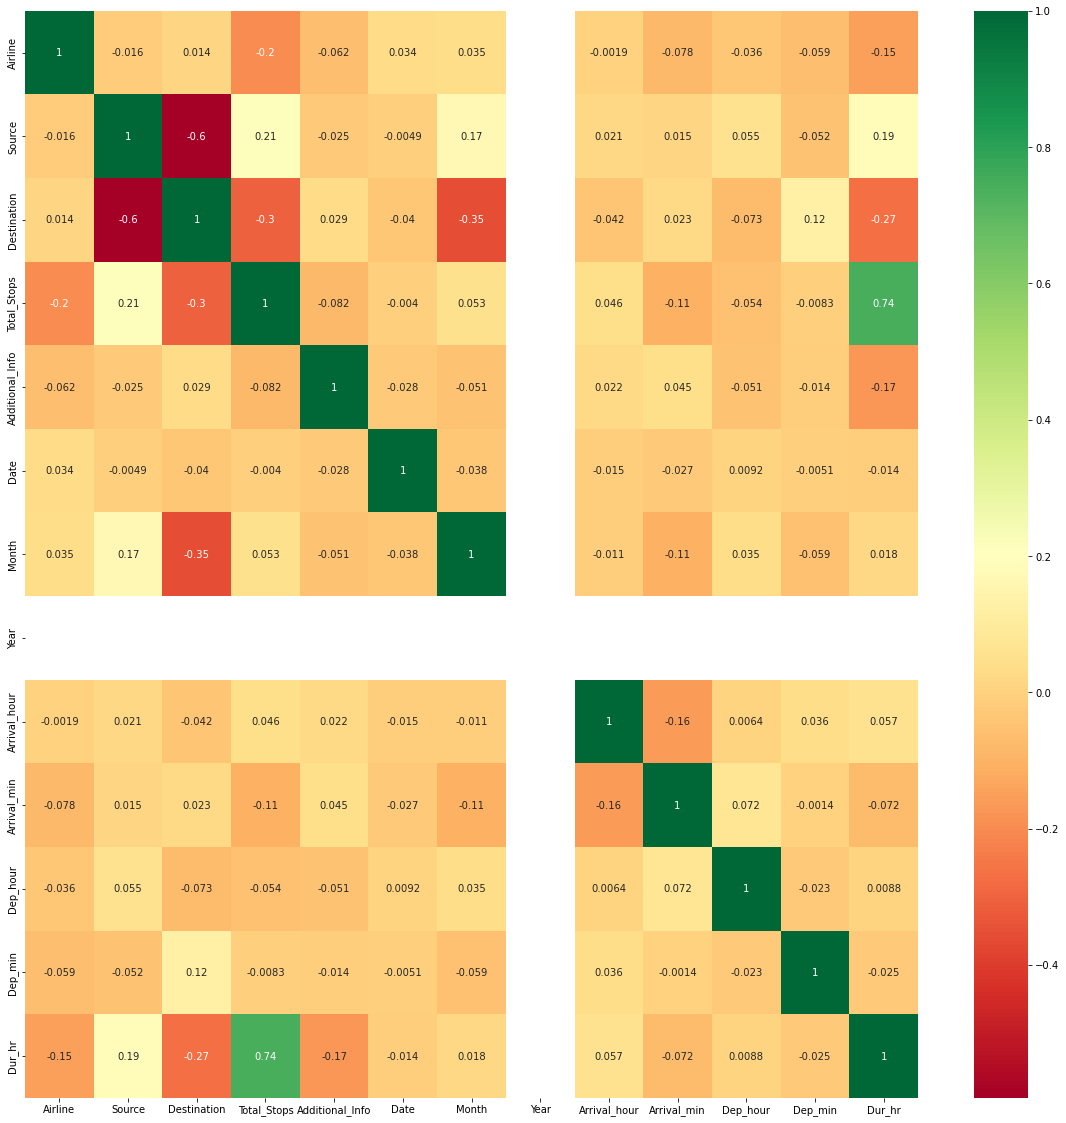

In [127]:
#get correlations of each features in dataset
corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [128]:
##feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[-1.26623125,  0.8992782 , -0.97485922, ..., -0.94528367,
        -1.30704891,  0.32374105],
       [ 0.01600707, -1.66524151,  0.39703706, ..., -0.25001426,
        -0.7728069 , -0.96938324],
       [ 0.01600707,  0.0444383 , -0.28891108, ...,  1.14052457,
        -0.5056859 ,  1.61686534],
       ...,
       [-0.4114057 , -1.66524151,  2.45488149, ..., -1.11910102,
         0.02855612, -0.61671298],
       [ 0.01600707,  0.8992782 , -0.97485922, ...,  1.31434193,
         0.02855612,  1.73442209],
       [-0.4114057 , -1.66524151,  2.45488149, ...,  1.31434193,
        -1.30704891, -0.96938324]])

In [129]:
#model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
#print(y_pred)
#print(y_test)
linear.score(X_test, y_test)

0.44427600705391046

In [130]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MAE: 2456.288269913615
MSE: 11678657.391541623


In [131]:
print('Intercept parameter:', linear.intercept_)
coeff_df = pd.DataFrame(linear.coef_ , X_train.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 7992.183809787151
                  Coefficient
Airline          1.877455e+02
Source          -2.294489e+02
Destination      1.303695e+02
Total_Stops      3.752869e+03
Additional_Info  8.421329e+00
Date            -7.775346e+01
Month           -4.793737e+02
Year             1.364242e-12
Arrival_hour    -6.108894e+00
Arrival_min     -7.844673e+00
Dep_hour         4.021276e+01
Dep_min         -8.571946e+00
Dur_hr           7.705652e+01


In [132]:
#lasso training
from sklearn.linear_model import Lasso
laso=Lasso(alpha=5)
laso.fit(X_train,y_train)
print(laso.score(X_train,y_train))
laso.score(X_test,y_test)

0.42934156372459975


0.4441102153058769

In [133]:
print('MAE:', metrics.mean_absolute_error(y_test, laso.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test,laso.predict(X_test) ))

MAE: 2455.7633352366056
MSE: 11682141.54023451


In [134]:
#Ridge regression
from sklearn.linear_model import Ridge
rig=Ridge(alpha=0.1)
rig.fit(X_train,y_train)
print(rig.score(X_train,y_train))
rig.score(X_test,y_test)

0.4293506373675726


0.4442749357244681

In [135]:
print('Intercept parameter:', rig.intercept_)
coeff_df = pd.DataFrame(rig.coef_ , X_train.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 7992.263074209399
                 Coefficient
Airline           187.737542
Source           -229.443186
Destination       130.357450
Total_Stops      3752.597282
Additional_Info     8.427105
Date              -77.753302
Month            -479.368156
Year                0.000000
Arrival_hour       -6.109131
Arrival_min        -7.845313
Dep_hour           40.210597
Dep_min            -8.571769
Dur_hr             77.071482


In [136]:
print('MAE:', metrics.mean_absolute_error(y_test, rig.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, rig.predict(X_test) ))

MAE: 2456.2883348779455
MSE: 11678679.90575672
